# Introduction
The provided student performance dataset contains various attributes that can be analyzed and used to predict academic outcomes. This dataset includes demographic information, parental background, study habits, and participation in extracurricular activities. By exploring this dataset, we can gain insights into factors that influence student performance and apply various data analysis and machine learning techniques.
<font color = 'green'>
    
Content:
    
1. [Data Loading and Checking](#1)
    * [Data Description](#2)
    * [Detection Outlier](#3)
1. [Data Visualiton](#4)
1. [Scaling for ML and DL](#5)
1. [Machine Learning and Deep Learning Methods](#6)
    
    
    



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<a id ="1"></a>
# Data Loading and Checking

In [2]:
data = pd.read_csv("/kaggle/input/student-performance-data/Student_performance_data _.csv")

In [3]:
data.tail(60)
["Gender","Extracurricular","Sports","Music","Volunteering","Tutoring"]

['Gender', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Tutoring']

In [4]:
data.info() #StudentID will be drooped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
data.drop(["StudentID"],axis=1,inplace = True)
#del(data["StudentID"])

In [6]:
data.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<a id ="2"></a>
# Data Description

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:

    0: Caucasian
    1: African American
    2: Asian
    3: Other
ParentalEducation: The education level of the parents, coded as follows:

    0: None
    1: High School
    2: Some College
    3: Bachelor's
    4: Higher
    
Absences : Number of absences
Tutoring : Number of tutoring
ParentalSupport: The level of parental support, coded as follows:

    0: None
    1: Low
    2: Moderate
    3: High
    4: Very High
    
Extacurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes. 

GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

GradeClass: Classification of students' grades based on GPA:

    0: 'A' (GPA >= 3.5)
    1: 'B' (3.0 <= GPA < 3.5)
    2: 'C' (2.5 <= GPA < 3.0)
    3: 'D' (2.0 <= GPA < 2.5)
    4: 'F' (GPA < 2.0)
  


<a id ="3"></a>
# Detection Outlier

In [7]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [8]:
data.loc[detect_outliers(data,data.columns)]

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
533,15,1,3,4,16.815701,24,0,3,0,1,1,1,1.662532,4.0
638,16,0,0,4,4.598367,24,1,2,0,1,1,1,1.278347,4.0
675,15,0,3,4,13.959809,25,0,2,0,1,1,1,1.268009,4.0
786,17,0,2,4,2.579578,21,1,3,1,0,1,1,1.886543,4.0
1004,15,1,2,4,0.135763,17,0,2,0,1,1,1,1.427724,4.0
1099,17,0,1,4,14.844020,6,0,1,0,1,1,1,3.154023,1.0
1149,15,1,2,4,16.506168,25,0,0,1,0,1,1,0.963340,4.0
2318,17,0,0,4,12.941403,9,0,2,1,0,1,1,2.596111,2.0
2368,15,0,0,4,6.682728,3,0,2,0,0,1,1,3.158592,1.0


In [9]:
data = data.drop(detect_outliers(data,data.columns),axis = 0).reset_index(drop = True)

In [10]:
data.loc[detect_outliers(data,data.columns)]

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


In [11]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [12]:
data.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

<a id ="4"></a>
# Data Visulation

<Axes: >

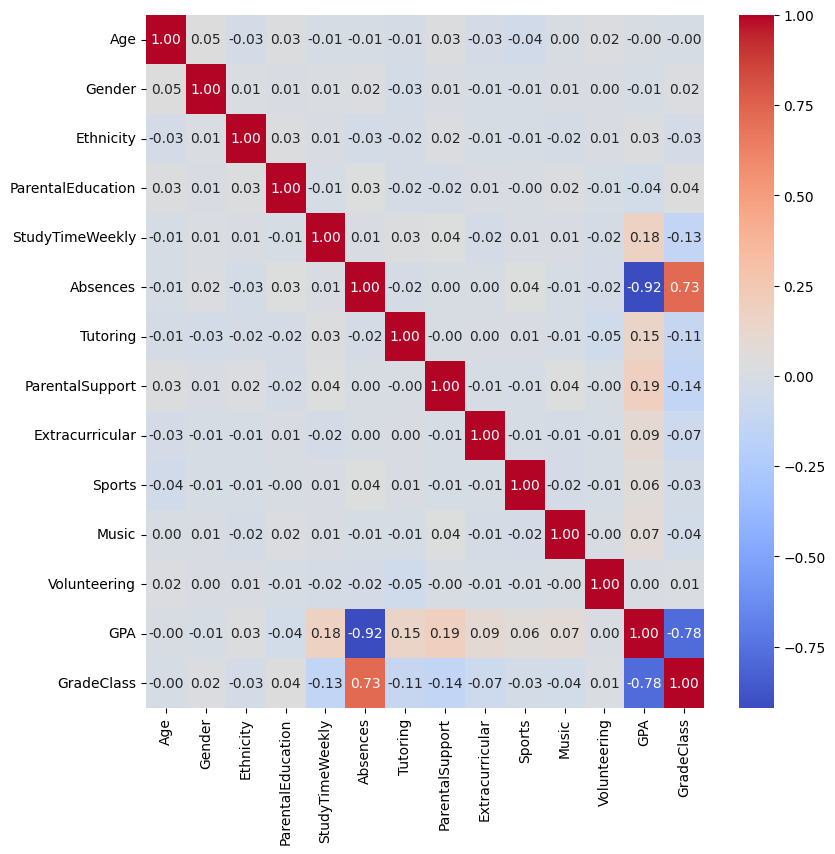

In [13]:
plt.figure(figsize = (9,9))
sns.heatmap(data[data.columns].corr(),annot= True ,cmap='coolwarm',fmt=".2f")

In [14]:
categ_variables =["Age","Absences","Gender","Ethnicity","ParentalEducation","Tutoring","ParentalSupport","Extracurricular","Sports","Music","Volunteering","GradeClass"]
non_categ_variables = ["StudyTimeWeekly","GPA"]
categ_variables2 = ["Age","Gender","Ethnicity","ParentalEducation","Tutoring","ParentalSupport","Extracurricular","Sports","Music","Volunteering","GradeClass"]
non_categ_variables2 = ["StudyTimeWeekly","GPA","Absences"]

In [15]:
for i in non_categ_variables2:
    for j in categ_variables2:
        print(data[[j,i]].groupby([j], as_index = False).mean().sort_values(by=i,ascending = True))
        print("\n\n")

   Age  StudyTimeWeekly
2   17         9.570772
3   18         9.819003
0   15         9.830077
1   16         9.861068



   Gender  StudyTimeWeekly
0       0         9.708007
1       1         9.832174



   Ethnicity  StudyTimeWeekly
2          2         9.429699
0          0         9.752653
1          1         9.919431
3          3        10.269628



   ParentalEducation  StudyTimeWeekly
3                  3         9.419829
4                  4         9.585577
0                  0         9.613106
1                  1         9.852004
2                  2         9.910301



   Tutoring  StudyTimeWeekly
0         0         9.656038
1         1        10.038794



   ParentalSupport  StudyTimeWeekly
1                1         9.320431
2                2         9.708006
0                0         9.811166
3                3         9.999146
4                4        10.166237



   Extracurricular  StudyTimeWeekly
1                1         9.604635
0                0         9

In [16]:
for i in non_categ_variables2:
    if i != "GPA":
        print(data[[i,"GPA"]].groupby([i], as_index = False).mean().sort_values(by="GPA",ascending = True))
        print("\n")

      StudyTimeWeekly  GPA
651          5.407665  0.0
956          7.952700  0.0
255          2.139825  0.0
30           0.237427  0.0
165          1.444587  0.0
...               ...  ...
2275        18.921512  4.0
2328        19.424398  4.0
1083         8.858282  4.0
2236        18.656924  4.0
2104        17.442121  4.0

[2383 rows x 2 columns]


    Absences       GPA
28        28  0.536255
29        29  0.609642
27        27  0.660363
26        26  0.720209
25        25  0.849482
24        24  0.932506
23        23  1.024511
22        22  1.123830
21        21  1.262733
20        20  1.389288
19        19  1.401635
18        18  1.566138
17        17  1.676476
16        16  1.770339
15        15  1.907235
13        13  2.048830
14        14  2.068891
12        12  2.130210
11        11  2.189109
10        10  2.440346
8          8  2.515815
9          9  2.525007
7          7  2.618820
6          6  2.753371
5          5  2.801303
4          4  2.971374
2          2  3.082517
3    

In [17]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (6,2))
    sns.barplot(x = data[variable],y = data["GPA"])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("{} and GPA relation".format(variable))
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    





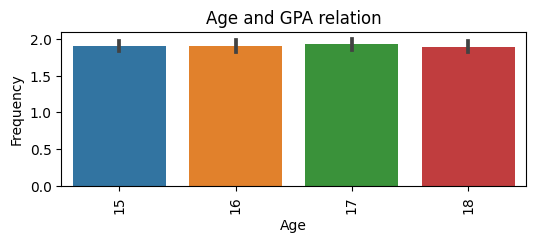

Age: 
 Age
15    625
16    592
17    584
18    582
Name: count, dtype: int64


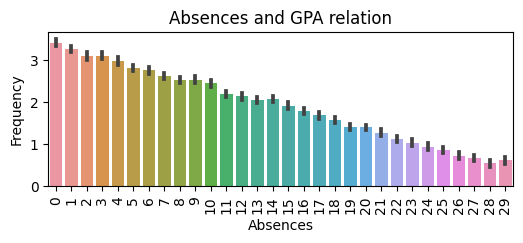

Absences: 
 Absences
13    93
12    92
25    91
8     91
19    90
20    90
15    87
6     87
23    86
7     86
1     85
27    84
14    84
5     83
21    82
17    80
26    80
16    79
18    79
24    79
3     78
11    71
22    71
2     69
29    69
4     69
0     67
9     66
10    61
28    54
Name: count, dtype: int64


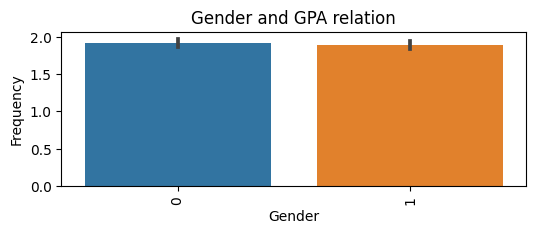

Gender: 
 Gender
1    1219
0    1164
Name: count, dtype: int64


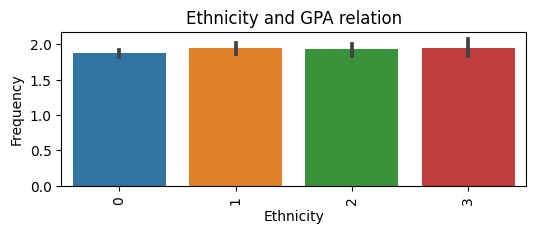

Ethnicity: 
 Ethnicity
0    1204
1     492
2     467
3     220
Name: count, dtype: int64


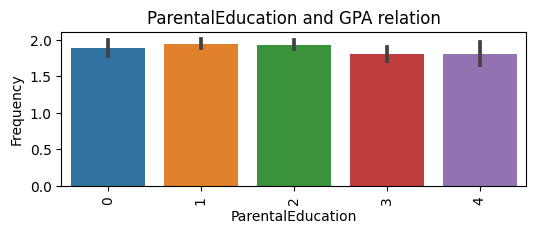

ParentalEducation: 
 ParentalEducation
2    934
1    728
3    367
0    243
4    111
Name: count, dtype: int64


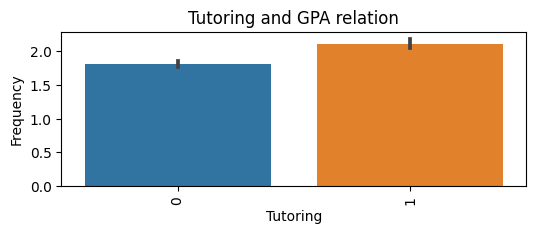

Tutoring: 
 Tutoring
0    1664
1     719
Name: count, dtype: int64


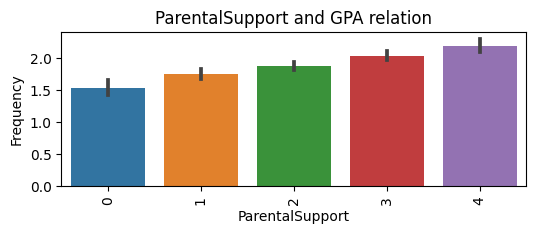

ParentalSupport: 
 ParentalSupport
2    735
3    695
1    488
4    254
0    211
Name: count, dtype: int64


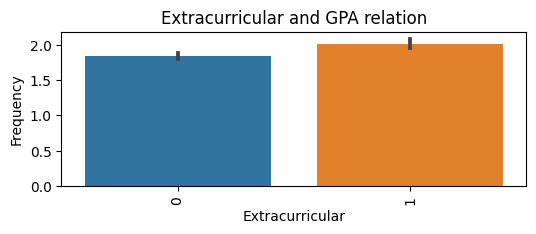

Extracurricular: 
 Extracurricular
0    1469
1     914
Name: count, dtype: int64


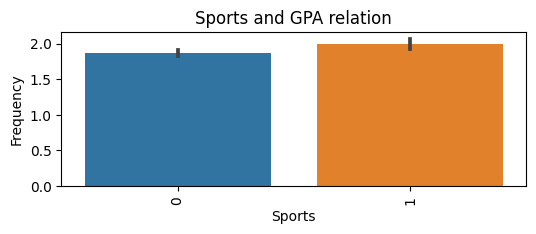

Sports: 
 Sports
0    1662
1     721
Name: count, dtype: int64


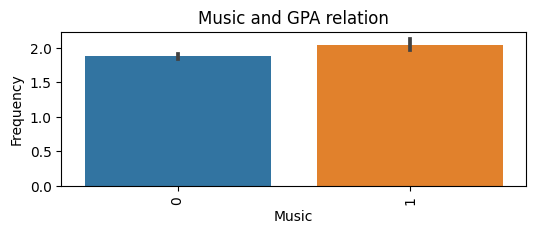

Music: 
 Music
0    1921
1     462
Name: count, dtype: int64


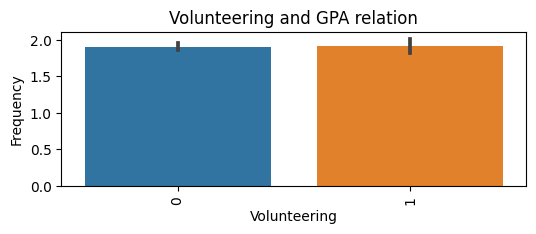

Volunteering: 
 Volunteering
0    2016
1     367
Name: count, dtype: int64


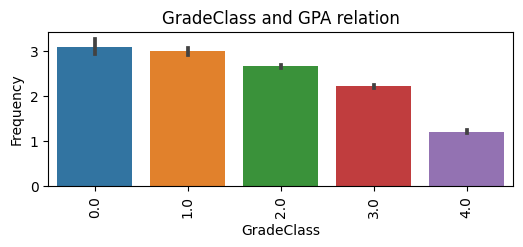

GradeClass: 
 GradeClass
4.0    1205
3.0     414
2.0     390
1.0     267
0.0     107
Name: count, dtype: int64


In [18]:
for i in categ_variables:
    bar_plot(i)

In [19]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 150)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

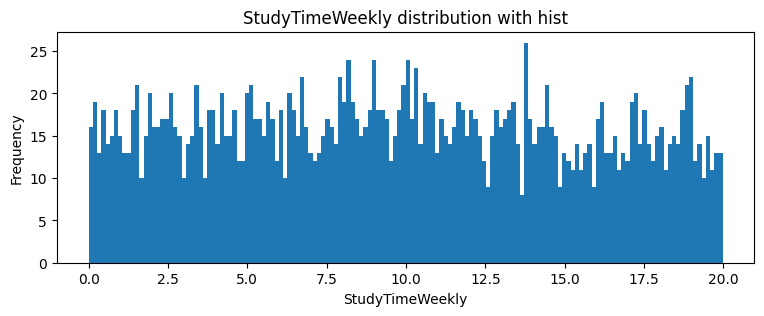

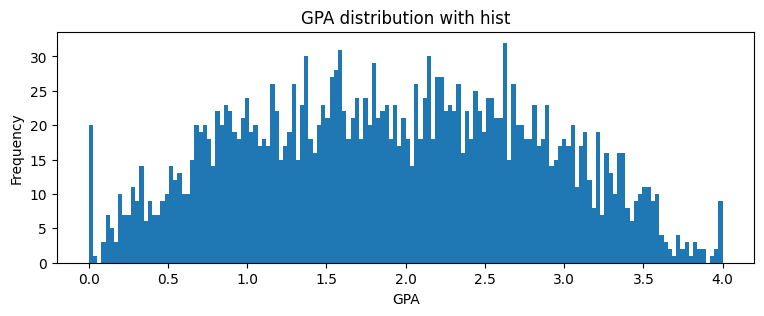

In [20]:
for n in non_categ_variables:
    plot_hist(n)

<Figure size 600x200 with 0 Axes>

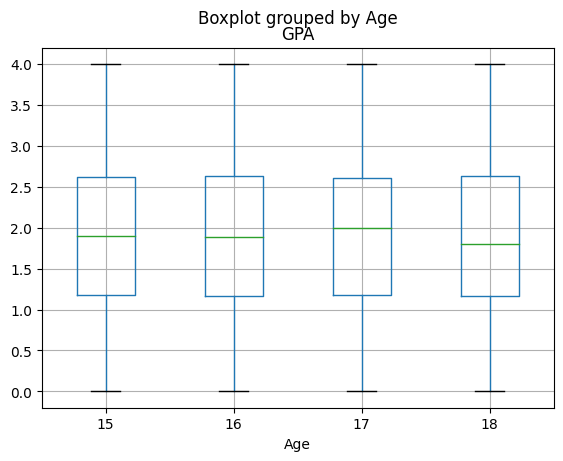

<Figure size 600x200 with 0 Axes>

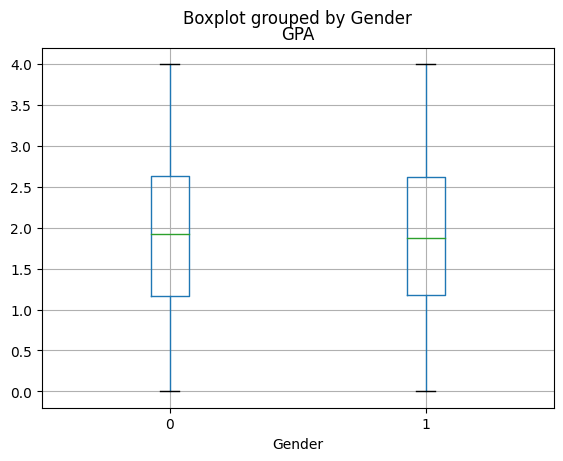

<Figure size 600x200 with 0 Axes>

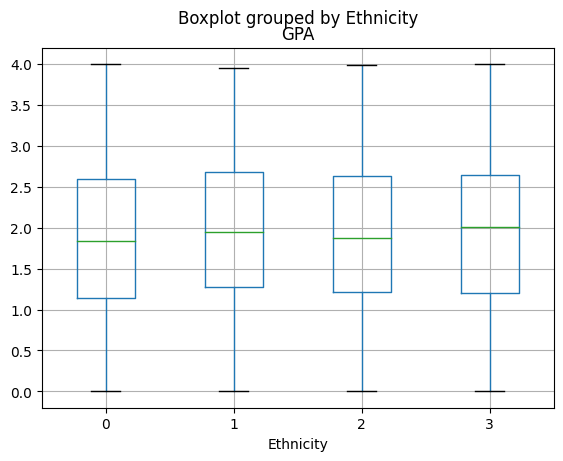

<Figure size 600x200 with 0 Axes>

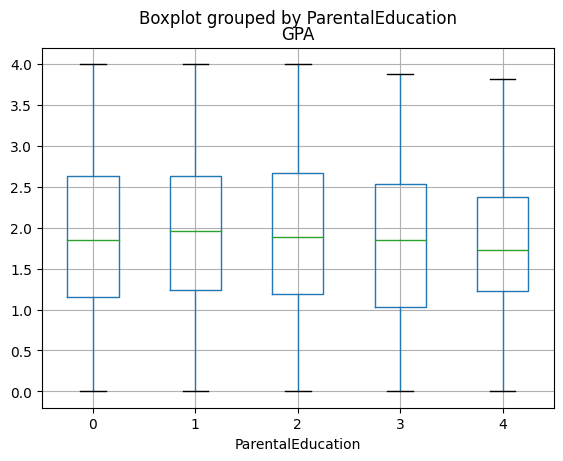

<Figure size 600x200 with 0 Axes>

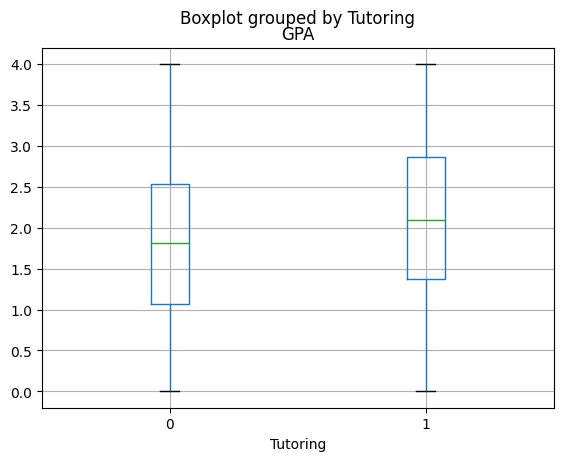

<Figure size 600x200 with 0 Axes>

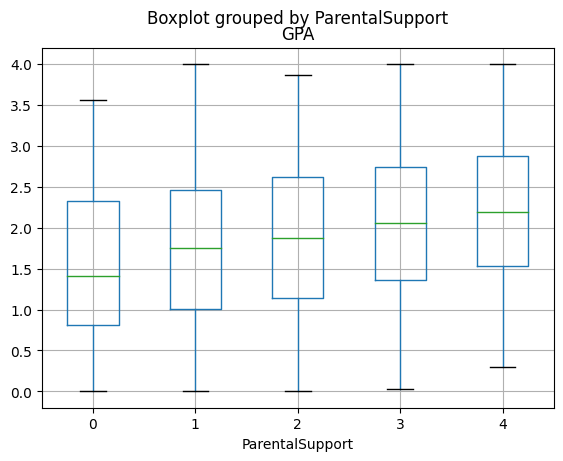

<Figure size 600x200 with 0 Axes>

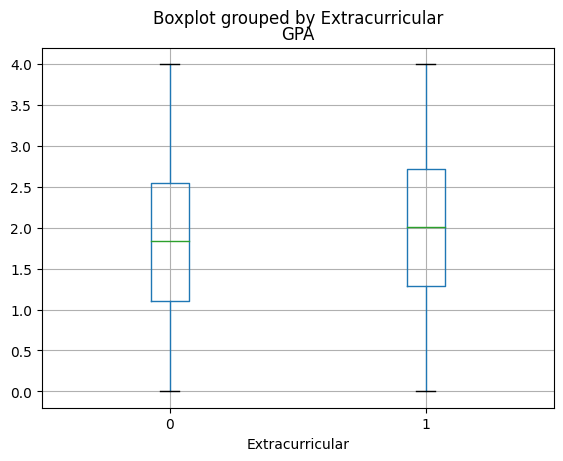

<Figure size 600x200 with 0 Axes>

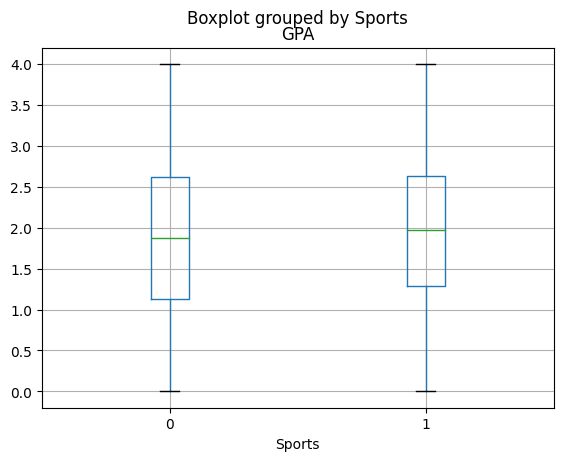

<Figure size 600x200 with 0 Axes>

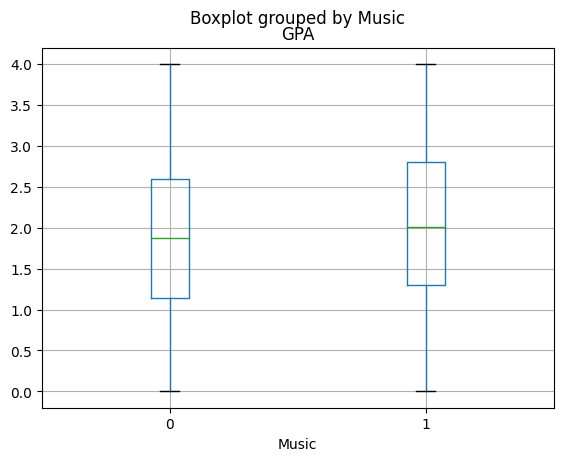

<Figure size 600x200 with 0 Axes>

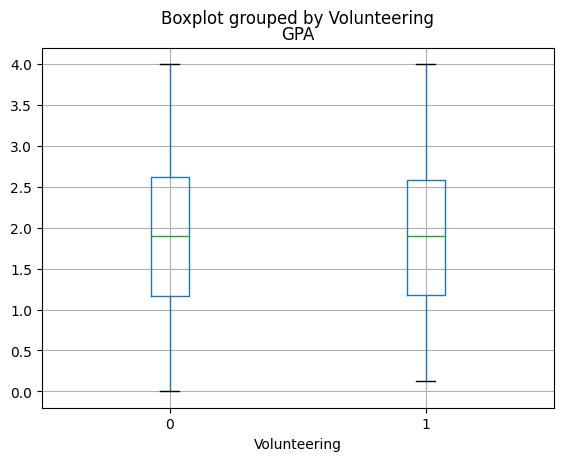

<Figure size 600x200 with 0 Axes>

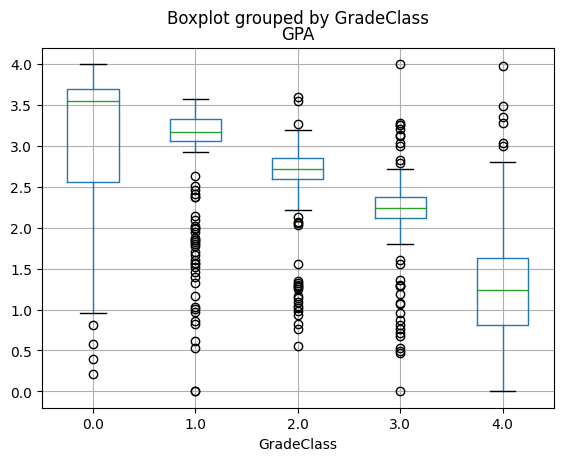

In [21]:
for i in categ_variables2:
    plt.figure(figsize = (6,2))
    data.boxplot(column="GPA",by = i)
    plt.show()



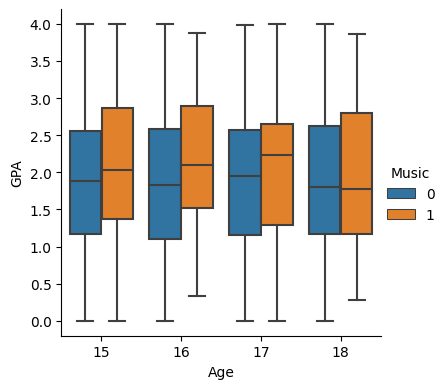

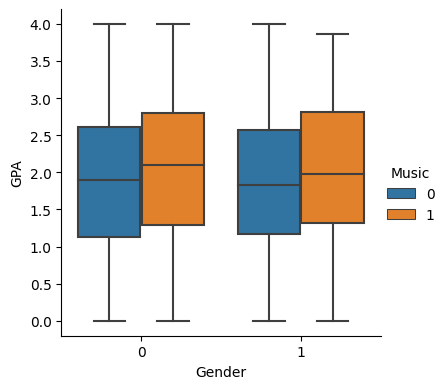

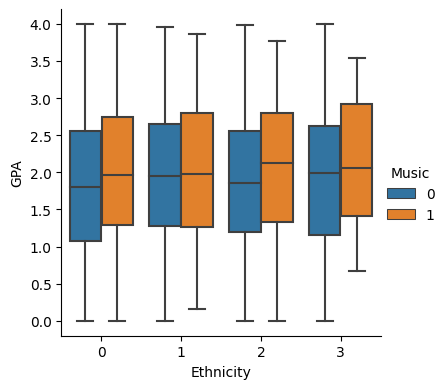

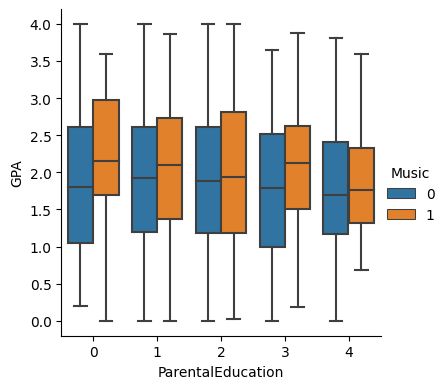

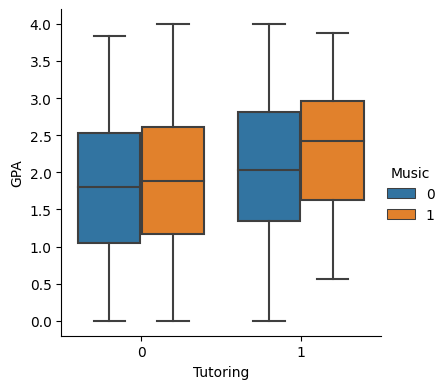

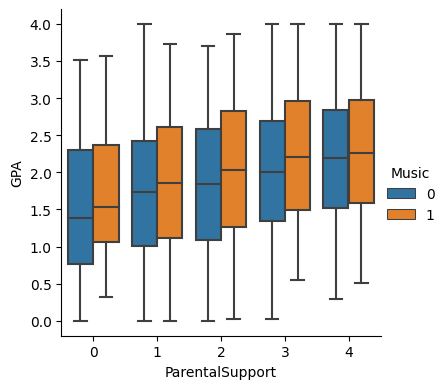

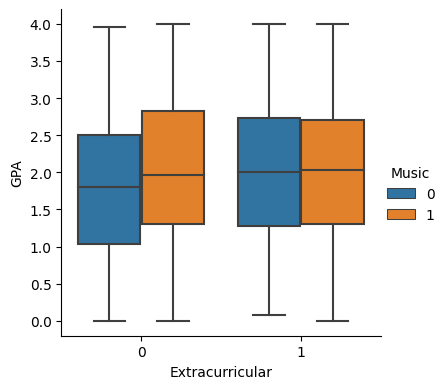

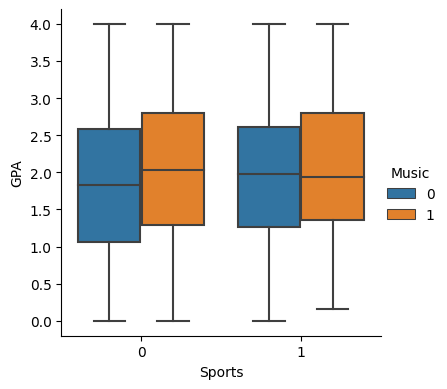

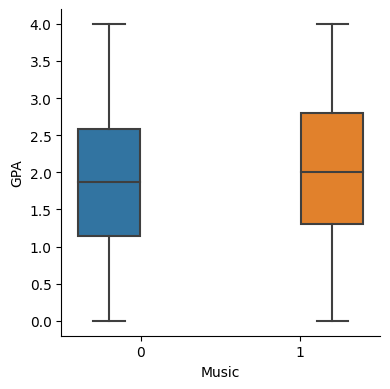

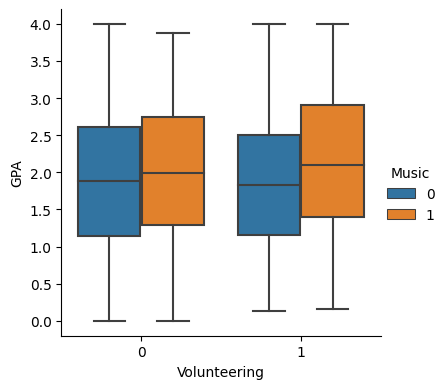

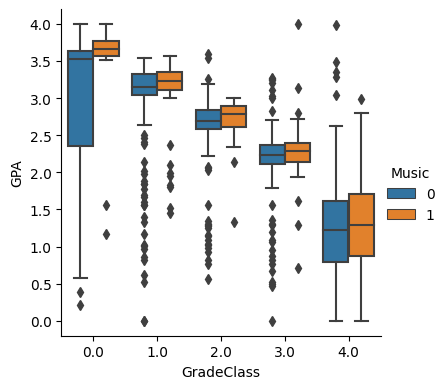

In [22]:
for i in categ_variables2:
    sns.catplot(x = i, y = "GPA", hue = "Music",data = data, kind = "box",height=4, aspect=1)
    plt.show()

<a id ="5"></a>
# Scaling for ML and DL

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])


In [24]:
data2 = data.copy()

<a id ="6"></a>
# Machine Learning and Deep Learning Methods

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

for i in data.columns:
    
    x = data.drop(columns = i)
    y = data[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Label Name: {}".format(i))
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")

Label Name: Age
Mean Squared Error: 0.14343526071547463
R-squared: -0.02757183360614701


Label Name: Gender
Mean Squared Error: 0.25301177766697647
R-squared: -0.016339761321801927


Label Name: Ethnicity
Mean Squared Error: 0.1168451029962639
R-squared: -0.0058891199257256055


Label Name: ParentalEducation
Mean Squared Error: 0.06669729684963989
R-squared: 0.0005470108979614974


Label Name: StudyTimeWeekly
Mean Squared Error: 0.05123408789389128
R-squared: 0.371252131951741


Label Name: Absences
Mean Squared Error: 0.004293930923355716
R-squared: 0.9488622191663704


Label Name: Tutoring
Mean Squared Error: 0.15224315206937258
R-squared: 0.2688337523811155


Label Name: ParentalSupport
Mean Squared Error: 0.04177037378391418
R-squared: 0.4575861898265594


Label Name: Extracurricular
Mean Squared Error: 0.19848763311173034
R-squared: 0.1639819941821754


Label Name: Sports
Mean Squared Error: 0.16883373848580646
R-squared: 0.16037393591674554


Label Name: Music
Mean Squared Error

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

for i in data.columns:
    
    x = data.drop(columns = i)
    y = data[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred_linear = model.predict(x_test)
    
    poly = PolynomialFeatures(degree=2)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.fit_transform(x_test)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly_train,y_train)
    y_pred_poly = model_poly.predict(x_poly_test)

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f'Label Name: {i}')
    print(f'Linear Regression - Mean Squared Error: {mse_linear}')
    print(f'Linear Regression - R-squared: {r2_linear}')
    print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
    print(f'Polynomial Regression - R-squared: {r2_poly}')
    print("\n")


Label Name: Age
Linear Regression - Mean Squared Error: 0.14343526071547463
Linear Regression - R-squared: -0.02757183360614701
Polynomial Regression - Mean Squared Error: 0.1494036413587139
Polynomial Regression - R-squared: -0.070329380185983


Label Name: Gender
Linear Regression - Mean Squared Error: 0.25301177766697647
Linear Regression - R-squared: -0.016339761321801927
Polynomial Regression - Mean Squared Error: 0.2597035349120185
Polynomial Regression - R-squared: -0.043220324052764214


Label Name: Ethnicity
Linear Regression - Mean Squared Error: 0.1168451029962639
Linear Regression - R-squared: -0.0058891199257256055
Polynomial Regression - Mean Squared Error: 0.1206240476300315
Polynomial Regression - R-squared: -0.038421072009589


Label Name: ParentalEducation
Linear Regression - Mean Squared Error: 0.06669729684963989
Linear Regression - R-squared: 0.0005470108979614974
Polynomial Regression - Mean Squared Error: 0.06795252263951049
Polynomial Regression - R-squared: -0.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

for i in ["Gender","Extracurricular","Sports","Music","Volunteering","Tutoring"]:
    
    y = data[i]
    x = data.drop(columns = i)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {i}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print("\n\n")


Accuracy: Gender
Accuracy: 0.4758909853249476
              precision    recall  f1-score   support

         0.0       0.43      0.40      0.42       223
         1.0       0.51      0.54      0.52       254

    accuracy                           0.48       477
   macro avg       0.47      0.47      0.47       477
weighted avg       0.47      0.48      0.47       477




Accuracy: Extracurricular
Accuracy: 0.6582809224318659
              precision    recall  f1-score   support

         0.0       0.66      0.93      0.77       292
         1.0       0.68      0.23      0.34       185

    accuracy                           0.66       477
   macro avg       0.67      0.58      0.55       477
weighted avg       0.66      0.66      0.60       477




Accuracy: Sports
Accuracy: 0.7274633123689728
              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       344
         1.0       0.71      0.04      0.07       133

    accuracy                 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



for col in data.columns:
    
    print(f"*** {col} for column KNN Regression ***")
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=7)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")


*** Age for column KNN Regression ***
RMSE: 0.3941629762679502
R2 Score: -0.11303269418598672


*** Gender for column KNN Regression ***
RMSE: 0.5270665707313056
R2 Score: -0.11590987865786517


*** Ethnicity for column KNN Regression ***
RMSE: 0.36960873784368714
R2 Score: -0.17604531029210757


*** ParentalEducation for column KNN Regression ***
RMSE: 0.276337020019103
R2 Score: -0.14427992303193582


*** StudyTimeWeekly for column KNN Regression ***
RMSE: 0.3026480053909826
R2 Score: -0.1240694599219836


*** Absences for column KNN Regression ***
RMSE: 0.17900979064401762
R2 Score: 0.6183718577804107


*** Tutoring for column KNN Regression ***
RMSE: 0.47502102582003725
R2 Score: -0.0836874263383165


*** ParentalSupport for column KNN Regression ***
RMSE: 0.2903699377054321
R2 Score: -0.09487787467294417


*** Extracurricular for column KNN Regression ***
RMSE: 0.5104478945101872
R2 Score: -0.09745067964246035


*** Sports for column KNN Regression ***
RMSE: 0.47874427510739226
R2

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



for col in data.columns:
    print(f"*** {col}  for column SVM Regression ***")
    

    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = SVR(kernel='linear')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")


*** Age  for column SVM Regression ***
RMSE or MSE: 0.3803328394967912
R2 Score: -0.03629622452534975


*** Gender  for column SVM Regression ***
RMSE or MSE: 0.592636614033714
R2 Score: -0.4108314657545391


*** Ethnicity  for column SVM Regression ***
RMSE or MSE: 0.3659833592537049
R2 Score: -0.15308752365780487


*** ParentalEducation  for column SVM Regression ***
RMSE or MSE: 0.2610670381078997
R2 Score: -0.02131150031638107


*** StudyTimeWeekly  for column SVM Regression ***
RMSE or MSE: 0.2266621960459595
R2 Score: 0.3695136321993261


*** Absences  for column SVM Regression ***
RMSE or MSE: 0.06546375301732847
R2 Score: 0.9489625904569129


*** Tutoring  for column SVM Regression ***
RMSE or MSE: 0.43527009555038193
R2 Score: 0.09009504601641927


*** ParentalSupport  for column SVM Regression ***
RMSE or MSE: 0.20438883457429075
R2 Score: 0.45752876856369606


*** Extracurricular  for column SVM Regression ***
RMSE or MSE: 0.4619588727059412
R2 Score: 0.10114672731721908


*

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



for col in ["Gender","Extracurricular","Sports","Music","Volunteering","Tutoring"]:
    
    print(f"*** {col}  for column Naive Bayes  ***")
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = GaussianNB() 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")


*** Gender  for column Naive Bayes  ***
RMSE or MSE: 0.7108031303720816
R2 Score: -1.0295363864270337


*** Extracurricular  for column Naive Bayes  ***
RMSE or MSE: 0.6393786291756559
R2 Score: -0.7218622732321358


*** Sports  for column Naive Bayes  ***
RMSE or MSE: 0.5280397672591789
R2 Score: -0.3866279069767442


*** Music  for column Naive Bayes  ***
RMSE or MSE: 0.4823944470199914
R2 Score: -0.30327868852458995


*** Volunteering  for column Naive Bayes  ***
RMSE or MSE: 0.38851434494290565
R2 Score: -0.1777777777777778


*** Tutoring  for column Naive Bayes  ***
RMSE or MSE: 0.5551361100027009
R2 Score: -0.48005319148936176




In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2383 non-null   float64
 1   Gender             2383 non-null   float64
 2   Ethnicity          2383 non-null   float64
 3   ParentalEducation  2383 non-null   float64
 4   StudyTimeWeekly    2383 non-null   float64
 5   Absences           2383 non-null   float64
 6   Tutoring           2383 non-null   float64
 7   ParentalSupport    2383 non-null   float64
 8   Extracurricular    2383 non-null   float64
 9   Sports             2383 non-null   float64
 10  Music              2383 non-null   float64
 11  Volunteering       2383 non-null   float64
 12  GPA                2383 non-null   float64
 13  GradeClass         2383 non-null   float64
dtypes: float64(14)
memory usage: 260.8 KB


In [32]:
value_counts_dict = {}

for column in data.columns:
    value_counts_dict[column] = data[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print("\n")

Column: Age
Age
0.000000    625
0.333333    592
0.666667    584
1.000000    582
Name: count, dtype: int64


Column: Gender
Gender
1.0    1219
0.0    1164
Name: count, dtype: int64


Column: Ethnicity
Ethnicity
0.000000    1204
0.333333     492
0.666667     467
1.000000     220
Name: count, dtype: int64


Column: ParentalEducation
ParentalEducation
0.50    934
0.25    728
0.75    367
0.00    243
1.00    111
Name: count, dtype: int64


Column: StudyTimeWeekly
StudyTimeWeekly
0.992773    1
0.792818    1
0.398964    1
0.170295    1
0.254960    1
           ..
0.516788    1
0.153873    1
0.922733    1
0.758287    1
0.891967    1
Name: count, Length: 2383, dtype: int64


Column: Absences
Absences
0.448276    93
0.413793    92
0.862069    91
0.275862    91
0.655172    90
0.689655    90
0.517241    87
0.206897    87
0.793103    86
0.241379    86
0.034483    85
0.931034    84
0.482759    84
0.172414    83
0.724138    82
0.586207    80
0.896552    80
0.551724    79
0.620690    79
0.827586    79


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



for col in ["Gender","Extracurricular","Sports","Music","Volunteering","Tutoring"]:
    print(f"*** {col} DecisionTreeClassifier for column  ***")
    
    
    x = data.drop(columns=[col])
    y = data[col]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")


*** Gender DecisionTreeClassifier for column  ***
RMSE or MSE: 0.7078475951992421
R2 Score: -1.0126937608135314


*** Extracurricular DecisionTreeClassifier for column  ***
RMSE or MSE: 0.6943920315650578
R2 Score: -1.0309144761199551


*** Sports DecisionTreeClassifier for column  ***
RMSE or MSE: 0.6159991287532296
R2 Score: -0.8870650463367722


*** Music DecisionTreeClassifier for column  ***
RMSE or MSE: 0.568199923477496
R2 Score: -0.8081524147097914


*** Volunteering DecisionTreeClassifier for column  ***
RMSE or MSE: 0.518019126590541
R2 Score: -1.0938271604938272


*** Tutoring DecisionTreeClassifier for column  ***
RMSE or MSE: 0.5845674277345037
R2 Score: -0.6411474164133739




In [34]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


for col in ["Gender","Extracurricular","Sports","Music","Volunteering","Tutoring"]:
    print(f"*** {col} RandomForestClassifier for column ***")
    
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=300, random_state=42)    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")


*** Gender RandomForestClassifier for column ***
RMSE or MSE: 0.6943920315650578
R2 Score: -0.9369019455527707


*** Extracurricular RandomForestClassifier for column ***
RMSE or MSE: 0.624449443044222
R2 Score: -0.642391706775268


*** Sports RandomForestClassifier for column ***
RMSE or MSE: 0.547531146505959
R2 Score: -0.49088564434341664


*** Music RandomForestClassifier for column ***
RMSE or MSE: 0.4802165828634233
R2 Score: -0.29153743907842244


*** Volunteering RandomForestClassifier for column ***
RMSE or MSE: 0.38851434494290565
R2 Score: -0.1777777777777778


*** Tutoring RandomForestClassifier for column ***
RMSE or MSE: 0.5280397672591789
R2 Score: -0.33909574468085113




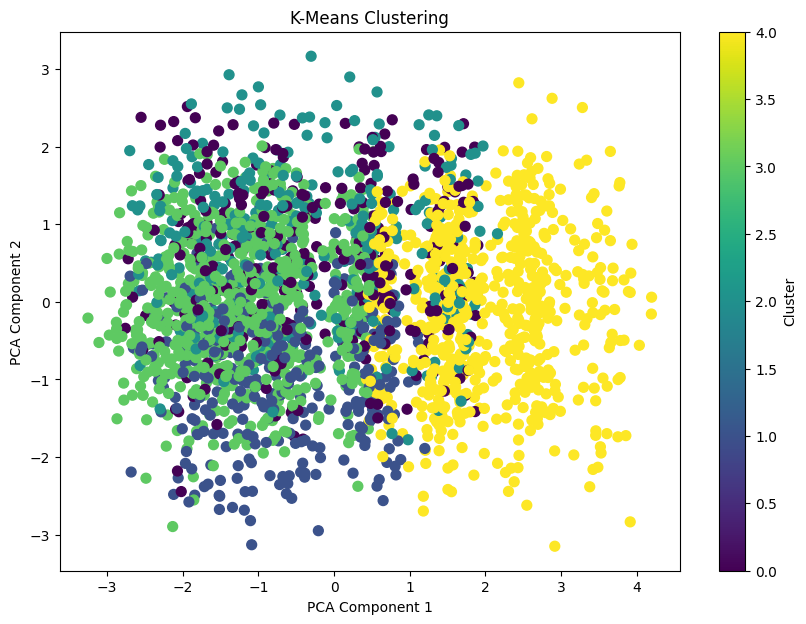

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = data.copy()  
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(df_scaled)

cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['GPA'])  
y = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae']) 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=1)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):",mse)
print("R-squared (R2) Score:", r2)


2024-07-20 16:49:02.369217: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 16:49:02.369384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 16:49:02.546630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0397 - mae: 0.1617 - mse: 0.0397 - val_loss: 0.0053 - val_mae: 0.0576 - val_mse: 0.0053
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - mae: 0.0807 - mse: 0.0107 - val_loss: 0.0027 - val_mae: 0.0413 - val_mse: 0.0027
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - mae: 0.0672 - mse: 0.0073 - val_loss: 0.0029 - val_mae: 0.0437 - val_mse: 0.0029
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - mae: 0.0612 - mse: 0.0063 - val_loss: 0.0039 - val_mae: 0.0512 - val_mse: 0.0039
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - mae: 0.0629 - mse: 0.0064 - val_loss: 0.0025 - val_mae: 0.0402 - val_mse: 0.0025
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - mae: 0.0604 - mse: 0.0059 - val_loss: 0.0025 - val_mae: 0.0398 - val_mse: 0.0025
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - mae: 0.0581 - mse: 0.005

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2383 non-null   float64
 1   Gender             2383 non-null   float64
 2   Ethnicity          2383 non-null   float64
 3   ParentalEducation  2383 non-null   float64
 4   StudyTimeWeekly    2383 non-null   float64
 5   Absences           2383 non-null   float64
 6   Tutoring           2383 non-null   float64
 7   ParentalSupport    2383 non-null   float64
 8   Extracurricular    2383 non-null   float64
 9   Sports             2383 non-null   float64
 10  Music              2383 non-null   float64
 11  Volunteering       2383 non-null   float64
 12  GPA                2383 non-null   float64
 13  GradeClass         2383 non-null   float64
dtypes: float64(14)
memory usage: 260.8 KB


In [39]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['GPA']) 
y = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1648
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0508
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 16/50
60/60 ━

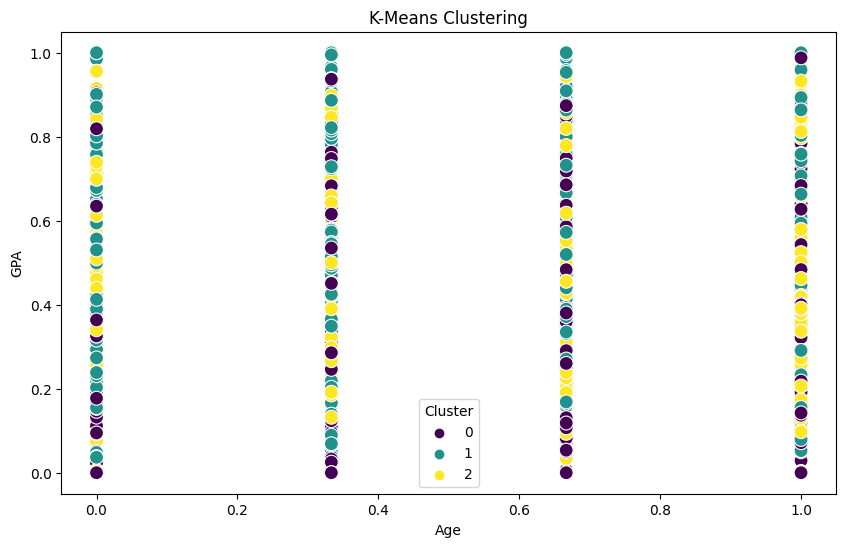

Cluster Centers:
[[5.19646799e-01 1.00000000e+00 2.99337748e-01 4.29470199e-01
  4.98417545e-01 5.13267869e-01 2.78145695e-01 5.37417219e-01
  4.99600361e-16 3.05960265e-01 2.06622517e-01 1.64238411e-01
  7.74503311e-01]
 [4.77753465e-01 5.07658643e-01 2.88110868e-01 4.37089716e-01
  4.80730845e-01 5.01131819e-01 3.04157549e-01 5.27899344e-01
  1.00000000e+00 2.97592998e-01 1.87089716e-01 1.50984683e-01
  7.18271335e-01]
 [4.75723623e-01 9.99200722e-16 2.88515406e-01 4.36274510e-01
  4.89910450e-01 4.88167681e-01 3.23529412e-01 5.27310924e-01
  4.99600361e-16 3.05322129e-01 1.89075630e-01 1.47058824e-01
  7.50700280e-01]]


In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



X = data.drop(columns=['GPA'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='GPA', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)


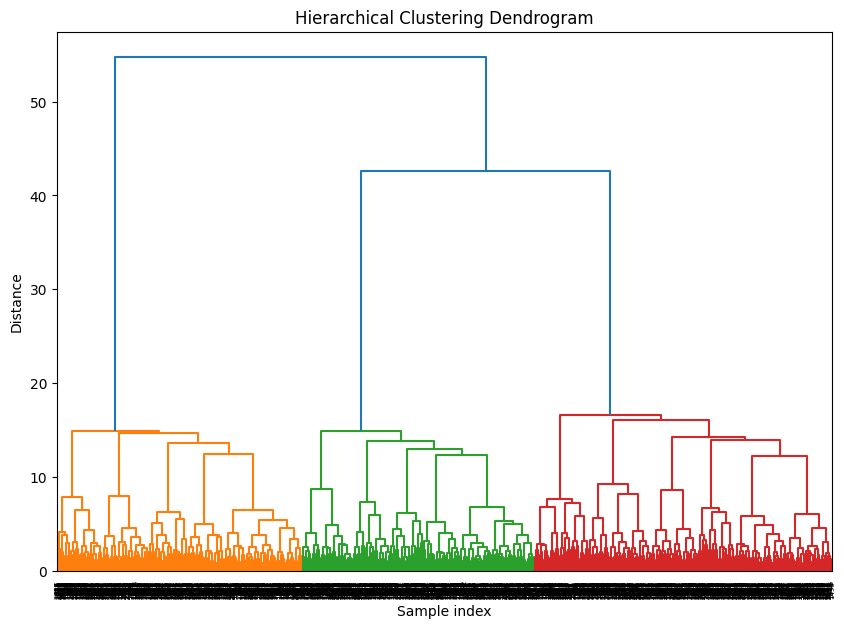

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = data.drop(columns=['GPA'])
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

data['Cluster'] = fcluster(linked, t=3, criterion='maxclust')
plt.figure

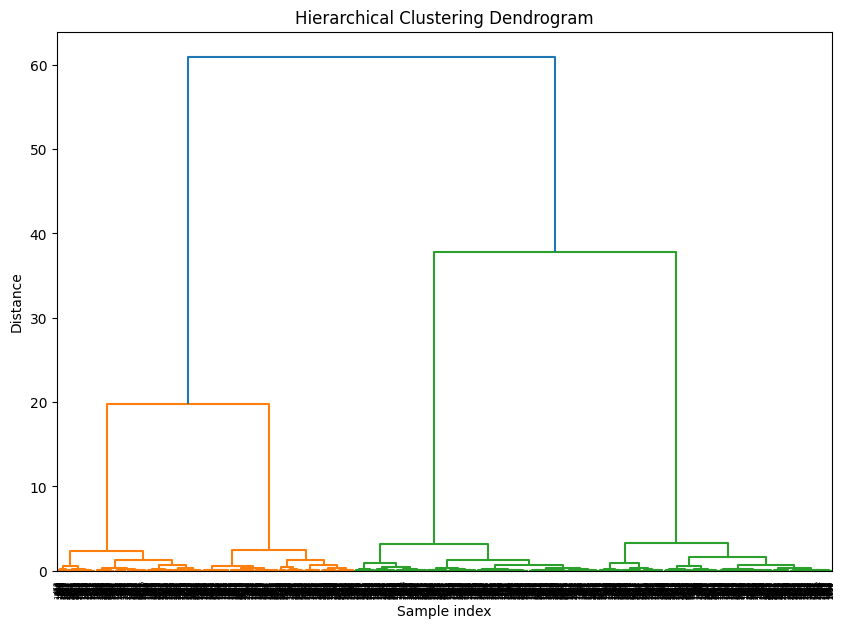

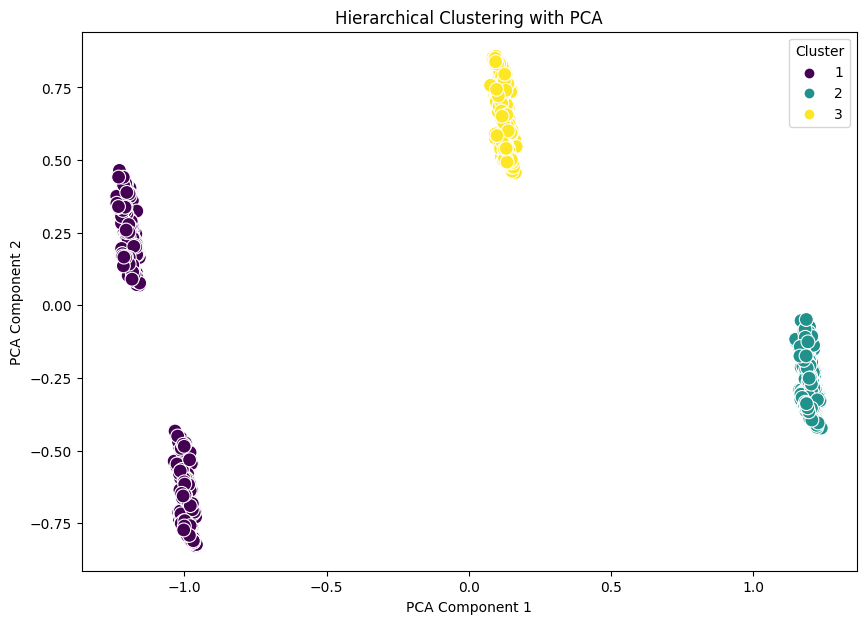

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop(columns=['GPA'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
linked = linkage(X_pca, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

data['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
